### Cridit Risk scoring

Problem: Determine the risk of *default* that each loan application carries

Dataset Source https://github.com/gastonstat/CreditScoring


#### Dataset Description
* status: whether the customer managed to pay back the loan (1) or not (2)
* seniority: job experience in years
* home: type of homeownership: renting (1), a homeowner (2), and others
* time: period planned for the loan (in months)
* age: age of the client
* marital [status]: single (1), married (2), and others
* records: whether the client has any previous records: no (1), yes (2) (It’s not
clear from the dataset description what kind of records we have in this column.
For the purposes of this project, we may assume that it’s about records in the
bank’s database.)
* job: type of job: full-time (1), part-time (2), and others
* expenses: how much the client spends per month
* income: how much the client earns per month
* assets: total worth of all the assets of the client
* debt: amount of credit debt
* amount: requested amount of the loan
* price: price of an item the client wants to buy

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data preparation

In [2]:
df = pd.read_csv('data/CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
#normalize columns names
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [6]:
# Identifying categorical variables
for i in df.columns.values:
    print(f'{i}' +': ' +str(df[i].nunique()))

status: 3
seniority: 47
home: 7
time: 11
age: 50
marital: 6
records: 2
job: 5
expenses: 94
income: 353
assets: 160
debt: 183
amount: 285
price: 1419


Categorical variables are represented by numbers. For converting, we'll use the following map (extracted from [Part1_CredScoring_Processing.R](https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R)). It's code in R which we'll translate to Pandas.

```
levels(dd$Status) = c("good", "bad")
levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")
levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")
levels(dd$Records) = c("no_rec", "yes_rec")
levels(dd$Job) = c("fixed", "partime", "freelance", "others")
```

Let's convert it:

In [7]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'nan'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'nan'
}

df.home = df.home.map(home_values)

In [9]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'nan'
}

df.marital = df.marital.map(marital_values)

In [10]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'nan'
}

df.records = df.records.map(records_values)

In [11]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'nan'
}

df.job = df.job.map(job_values)

In [12]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


After this, all the categorical variables have strings, not numbers

Let's look at numberical variables:  

In [13]:
for col,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(col)

seniority
time
age
expenses
income
assets
debt
amount
price


In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


#### 99999999 indicate missing values. Let's replace it by `NaN`: 

In [15]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [16]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Now the stats are more meaningful

In [17]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Let's look at the target variable

In [18]:
df.status.value_counts()

ok         3200
default    1254
nan           1
Name: status, dtype: int64

There's one record for which the status is unknown. Let's remove it - it's not useful for us

In [19]:
df = df[df.status != 'nan']

In [20]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

### Fill missing values
* lets fill those with mean, as filling missing values with 0 wont make sense in this case

In [21]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=np.nan, value=round(df[c].mean()))

In [22]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,131.0,5404.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11513.0,1243.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,164.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Now we're ready to prepare the data for training:

* First, do train-validation-test split
* Then, apply one-hot encoding to categorical features and get the feature matrix 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [25]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [26]:
del df_train['status']
del df_val['status']

In [27]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

For OHE, we'll use `DictVectorizer`

In [28]:
from sklearn.feature_extraction import DictVectorizer

In [29]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [30]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [31]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

Now we're ready to train a model. We'll start with decision trees

## Decision trees

We'll use `DecisionTreeClassifier` and for evaluating the quality of our models, we'll use AUC


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

Let's fit the tree with default parameters

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

To get the predictions (probabilities), we use `predict_proba`. Let's check AUC on train data:

In [34]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

And on validation:

In [35]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6685869802136059

That's a case of _overfitting_ - our model on the training data performs perfectly, but fails on validation

Let's change the depth parameter: restring the size of the tree to 2 levels:

In [36]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


It's even better than the previous tree!

### Tuning parameters

In [37]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [38]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [39]:
roc_auc_score(y_val, y_pred)

0.7580616841442444

In [40]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.738
   4 -> 0.758
   5 -> 0.765
   6 -> 0.750
  10 -> 0.689
  15 -> 0.675
  20 -> 0.664
None -> 0.670


In [41]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.758
5 -> 0.758
10 -> 0.758
15 -> 0.761
20 -> 0.758
50 -> 0.753
100 -> 0.752
200 -> 0.745


In [42]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.758
5 -> 0.758
10 -> 0.758
15 -> 0.761
20 -> 0.758
50 -> 0.753
100 -> 0.752
200 -> 0.745

depth: 5
1 -> 0.765
5 -> 0.765
10 -> 0.761
15 -> 0.762
20 -> 0.760
50 -> 0.765
100 -> 0.768
200 -> 0.757

depth: 6
1 -> 0.759
5 -> 0.753
10 -> 0.764
15 -> 0.774
20 -> 0.763
50 -> 0.765
100 -> 0.776
200 -> 0.766



In [43]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.744
5 -> 0.752
10 -> 0.764
15 -> 0.774
20 -> 0.763
50 -> 0.765
100 -> 0.776
200 -> 0.766


In [44]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7739458962001404

In [45]:
from sklearn.metrics import roc_curve

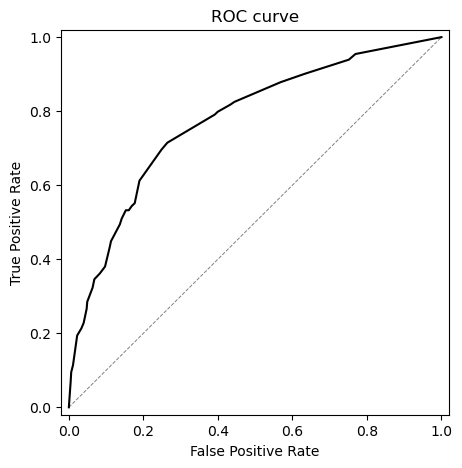

In [46]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7883739798018938

If we repeat one more time - it changes:

In [49]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.779858201545131

To understand how much it changes, we can repeat it 100 times and look at the mean and the standard deviation

In [50]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.784 +- 0.009
0.775 -- 0.793


To fix this issue, let's set the seed

In [51]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7846776537259935

Now we'll check how AUC depends on the number of trees

In [52]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.785
20 -> 0.802
30 -> 0.811
40 -> 0.815
50 -> 0.818
60 -> 0.819
70 -> 0.818
80 -> 0.818
90 -> 0.817
100 -> 0.819
110 -> 0.819
120 -> 0.819
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.818
180 -> 0.819
190 -> 0.820
200 -> 0.820


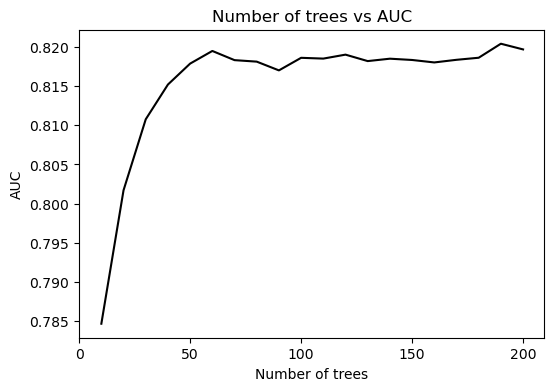

In [53]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('random_forest_n_estimators.svg')

plt.show()

Tuninig the `max_depth` parameter:

In [54]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()
    

depth: 5
10 -> 0.795
20 -> 0.801
30 -> 0.803
40 -> 0.803
50 -> 0.806
60 -> 0.806
70 -> 0.806
80 -> 0.805
90 -> 0.805
100 -> 0.806
110 -> 0.806
120 -> 0.808
130 -> 0.807
140 -> 0.806
150 -> 0.807
160 -> 0.805
170 -> 0.805
180 -> 0.805
190 -> 0.806
200 -> 0.806

depth: 10
10 -> 0.803
20 -> 0.815
30 -> 0.815
40 -> 0.820
50 -> 0.824
60 -> 0.825
70 -> 0.824
80 -> 0.824
90 -> 0.824
100 -> 0.826
110 -> 0.826
120 -> 0.827
130 -> 0.827
140 -> 0.826
150 -> 0.826
160 -> 0.826
170 -> 0.825
180 -> 0.825
190 -> 0.824
200 -> 0.824

depth: 20
10 -> 0.782
20 -> 0.806
30 -> 0.815
40 -> 0.817
50 -> 0.814
60 -> 0.814
70 -> 0.813
80 -> 0.816
90 -> 0.815
100 -> 0.815
110 -> 0.817
120 -> 0.819
130 -> 0.819
140 -> 0.819
150 -> 0.819
160 -> 0.819
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.821



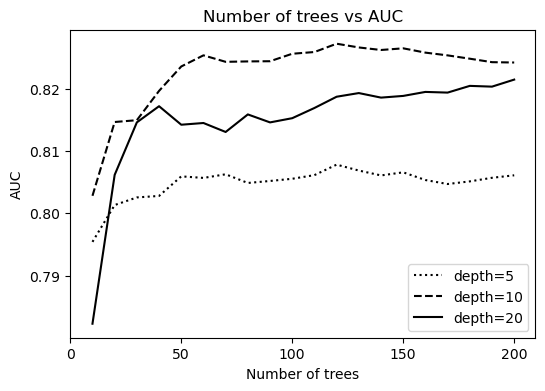

In [55]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

Tuning the `min_samples_leaf` parameter

In [56]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.802
30 -> 0.815
50 -> 0.820
70 -> 0.824
90 -> 0.826
110 -> 0.826
130 -> 0.826
150 -> 0.825
170 -> 0.826
190 -> 0.826

min_samples_leaf: 5
10 -> 0.801
30 -> 0.811
50 -> 0.814
70 -> 0.819
90 -> 0.820
110 -> 0.822
130 -> 0.824
150 -> 0.824
170 -> 0.823
190 -> 0.823

min_samples_leaf: 10
10 -> 0.805
30 -> 0.818
50 -> 0.818
70 -> 0.821
90 -> 0.821
110 -> 0.821
130 -> 0.822
150 -> 0.820
170 -> 0.820
190 -> 0.820



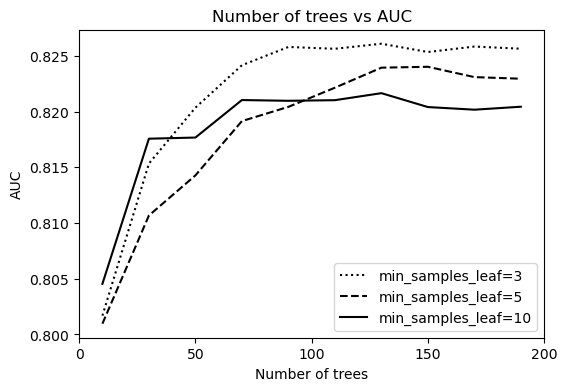

In [57]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('random_forest_n_estimators_sample_leaf.svg')

plt.show()

Training the final model:

In [58]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=3, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [59]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8262908381971857

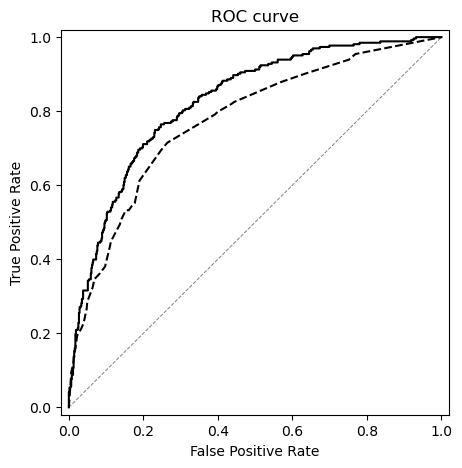

In [60]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## XGBoost

In [61]:
import xgboost as xgb

C:\Users\Rohan\Desktop\AAIC\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [62]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [63]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [64]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[23:20:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.09534836, 0.08485225, 0.13744122, 0.17860138, 0.08353133,
       0.1090995 , 0.08236196, 0.7509196 , 0.19159637, 0.02865067],
      dtype=float32)

In [66]:
roc_auc_score(y_val, y_pred)

0.8088657334528105

In [67]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [68]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [69]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.85913	val-auc:0.76577
[10]	train-auc:0.94871	val-auc:0.81153
[20]	train-auc:0.97352	val-auc:0.81605
[30]	train-auc:0.98584	val-auc:0.80932
[40]	train-auc:0.99298	val-auc:0.80825
[50]	train-auc:0.99702	val-auc:0.80536
[60]	train-auc:0.99866	val-auc:0.80549
[70]	train-auc:0.99954	val-auc:0.80473
[80]	train-auc:0.99972	val-auc:0.80381
[90]	train-auc:0.99995	val-auc:0.80467
[99]	train-auc:0.99999	val-auc:0.80462


To capture this output, we can use 

- `%%capture` instruction that saves the result to `output`
- `parse_xgb_output` function that parses it

In [70]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [71]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

Let's use it for plotting the scores

In [72]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

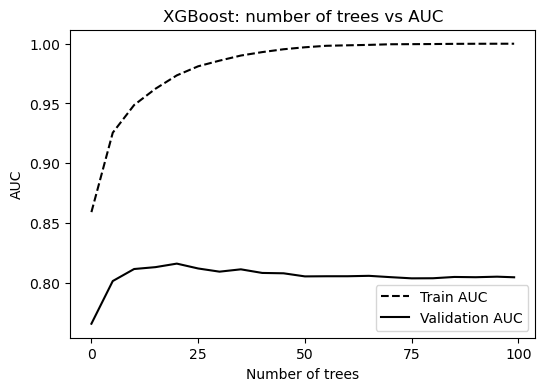

In [73]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

### Parameter tuning: eta

First, we try to set eta to 0.1

In [74]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [75]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81605
(0.81605, 20)


In [76]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [77]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.82512
(0.82512, 60)


In [78]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [79]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.82444
(0.82444, 140)


In [80]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [81]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.82268
(0.82268, 480)


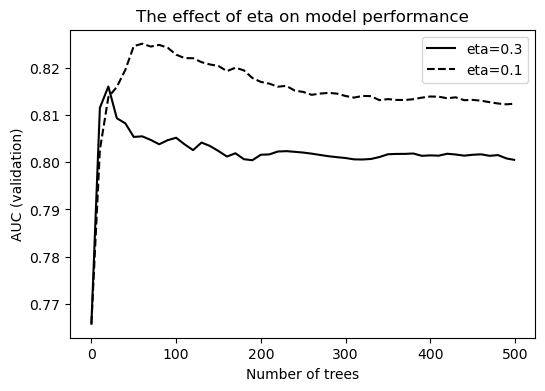

In [82]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('/06_xgb_eta.svg')

plt.show()

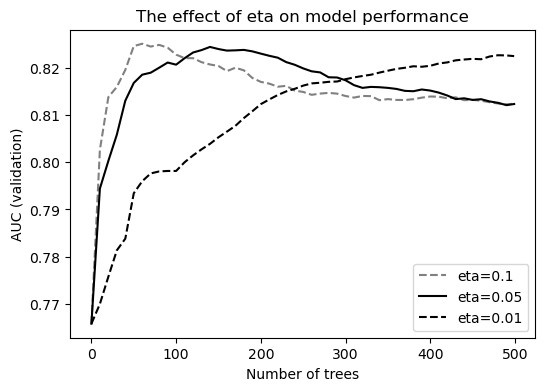

In [83]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

### Parameter tuning: max_depth

First, try 3

In [84]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [85]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.83198
(0.83198, 100)


Now, try 10

In [86]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [87]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81605
(0.81401, 130)


With depth=3 it's better than depth=6 and depth=10. So let's try 4 to see if it's better than 3

In [88]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [89]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.83086
(0.83086, 80)


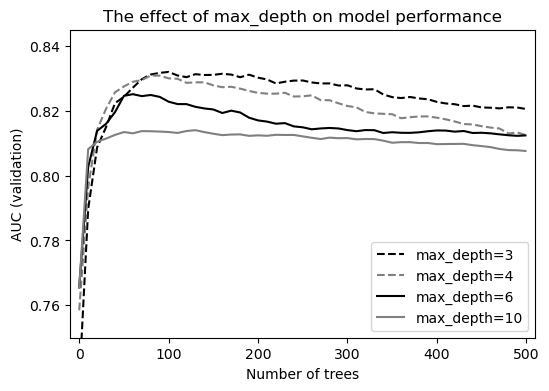

In [90]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

It's not better, so we'll leave it at 3

### Tune "min_child_weight"

First, the default value:

In [91]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [92]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.83198
(0.83198, 100)


In [93]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [94]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.8324
(0.8324, 160)


In [95]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [96]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.83243
(0.83243, 310)


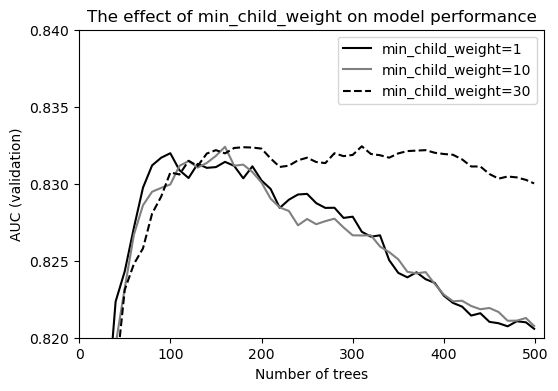

In [97]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

## Checking the best number of trees

In [98]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [99]:
print(output)

[0]	train-auc:0.77121	val-auc:0.73561
[10]	train-auc:0.84458	val-auc:0.78966
[20]	train-auc:0.86479	val-auc:0.80870
[30]	train-auc:0.87598	val-auc:0.81495
[40]	train-auc:0.88689	val-auc:0.82235
[50]	train-auc:0.89316	val-auc:0.82431
[60]	train-auc:0.89971	val-auc:0.82713
[70]	train-auc:0.90470	val-auc:0.82974
[80]	train-auc:0.90875	val-auc:0.83119
[90]	train-auc:0.91317	val-auc:0.83169
[100]	train-auc:0.91648	val-auc:0.83198
[110]	train-auc:0.91954	val-auc:0.83088
[120]	train-auc:0.92210	val-auc:0.83037
[130]	train-auc:0.92519	val-auc:0.83129
[140]	train-auc:0.92830	val-auc:0.83103
[150]	train-auc:0.93087	val-auc:0.83108
[160]	train-auc:0.93300	val-auc:0.83142
[170]	train-auc:0.93505	val-auc:0.83116
[180]	train-auc:0.93742	val-auc:0.83035
[190]	train-auc:0.93942	val-auc:0.83113
[200]	train-auc:0.94152	val-auc:0.83021
[210]	train-auc:0.94393	val-auc:0.82966
[220]	train-auc:0.94536	val-auc:0.82843
[230]	train-auc:0.94693	val-auc:0.82896
[240]	train-auc:0.94845	val-auc:0.82930
[250]	train

In [100]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.83198


In [101]:
max(zip(aucs_val, tree))

(0.83198, 100)

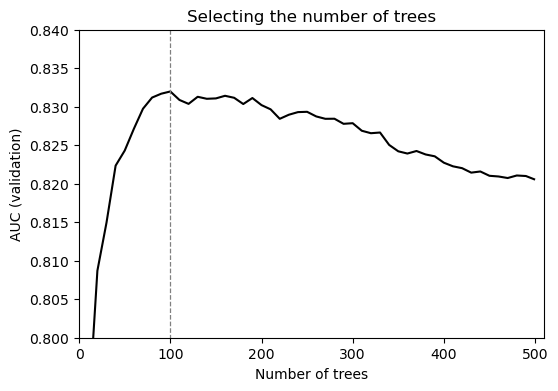

In [102]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(100, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

Final model

In [103]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77121	val-auc:0.73561
[10]	train-auc:0.84458	val-auc:0.78966
[20]	train-auc:0.86479	val-auc:0.80870
[30]	train-auc:0.87598	val-auc:0.81495
[40]	train-auc:0.88689	val-auc:0.82235
[50]	train-auc:0.89316	val-auc:0.82431
[60]	train-auc:0.89971	val-auc:0.82713
[70]	train-auc:0.90470	val-auc:0.82974
[80]	train-auc:0.90875	val-auc:0.83119
[90]	train-auc:0.91317	val-auc:0.83169
[99]	train-auc:0.91622	val-auc:0.83192


In [104]:
y_pred_xgb = model.predict(dval)

In [105]:
roc_auc_score(y_val, y_pred_xgb)

0.8319216051924149

In [106]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7739458962001404
0.8262908381971857
0.8319216051924149


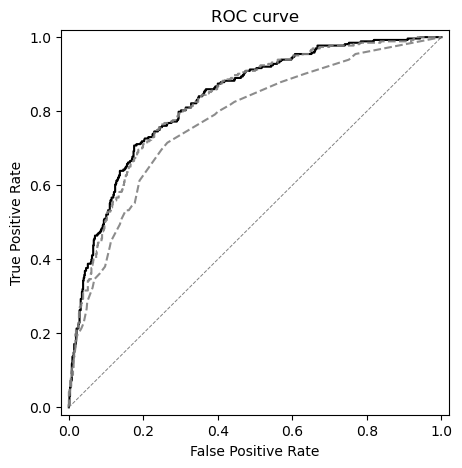

In [107]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Final test

In [108]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [109]:
dict_train_full = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [110]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=3, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [111]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 100

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [112]:
y_pred_xgb = xgb_final.predict(dtest)

In [113]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8203472459801574
0.831423195347246


## Feature importance

### Decision trees

In [114]:
dt.feature_importances_

array([0.01420163, 0.06451944, 0.1087721 , 0.01079239, 0.01893441,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.17069356, 0.00715488, 0.        ,
       0.        , 0.        , 0.17696997, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03092265,
       0.2499257 , 0.        , 0.13170047, 0.01541279])

In [115]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.01420163336533353),
 ('amount', 0.06451944176115945),
 ('assets', 0.10877209674315483),
 ('debt', 0.010792393370797092),
 ('expenses', 0.01893441286628308),
 ('home=ignore', 0.0),
 ('home=nan', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('income', 0.1706935617354968),
 ('job=fixed', 0.007154881379491426),
 ('job=freelance', 0.0),
 ('job=nan', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17696997475444667),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=nan', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030922650543424184),
 ('records=no', 0.24992569731316275),
 ('records=yes', 0.0),
 ('seniority', 0.13170046940986987),
 ('time', 0.015412786757380309)]

In [116]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
25,records=no,0.249926
17,job=partime,0.176970
12,income,0.170694
27,seniority,0.131700
2,assets,0.108772
1,amount,0.064519
24,price,0.030923
4,expenses,0.018934
28,time,0.015413
0,age,0.014202


In [117]:
df_importance = df_importance[df_importance.gain > 0]

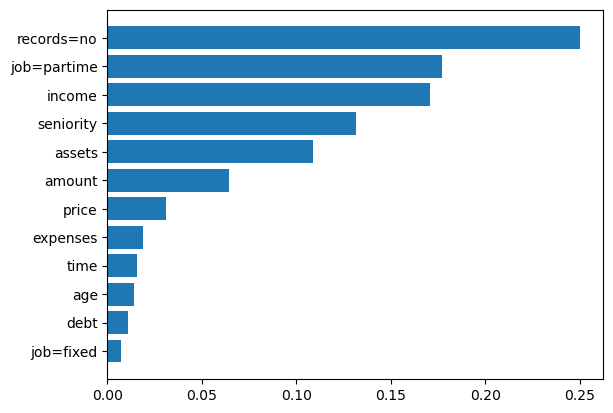

In [118]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

### Random forest

In [119]:
rf.feature_importances_

array([6.20984547e-02, 8.82595870e-02, 7.78625366e-02, 1.89961807e-02,
       4.18334002e-02, 1.47485988e-04, 1.00599661e-04, 6.30531918e-03,
       2.35945381e-02, 8.62403513e-03, 4.02319287e-03, 1.50564245e-02,
       1.38581698e-01, 4.17522820e-02, 1.15301500e-02, 0.00000000e+00,
       3.84206620e-03, 5.29985890e-02, 4.25090798e-04, 8.71137663e-03,
       0.00000000e+00, 2.00515967e-03, 6.88467398e-03, 3.89334791e-04,
       7.67489777e-02, 8.15883642e-02, 7.00211896e-02, 1.25354282e-01,
       3.22650104e-02])

In [120]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.138582
27,seniority,0.125354
1,amount,0.088260
25,records=no,0.081588
2,assets,0.077863
24,price,0.076749
26,records=yes,0.070021
0,age,0.062098
17,job=partime,0.052999
4,expenses,0.041833


In [121]:
df_importance = df_importance[df_importance.gain > 0.01]

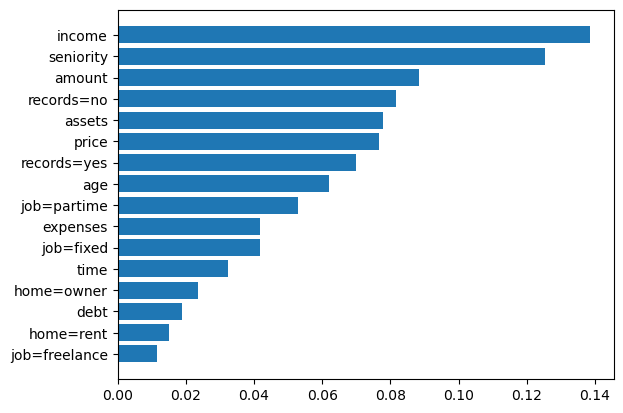

In [122]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

### XGBoost

In [123]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('job=partime', 27.027027130126953),
 ('records=no', 23.82752227783203),
 ('job=fixed', 18.911813735961914),
 ('seniority', 16.09290885925293),
 ('home=owner', 11.987762451171875),
 ('income', 11.767536163330078),
 ('home=rent', 8.384600639343262),
 ('assets', 8.049806594848633),
 ('amount', 7.629530906677246),
 ('home=parents', 7.33381986618042),
 ('price', 5.358295917510986),
 ('expenses', 5.172851085662842),
 ('time', 5.123366355895996),
 ('debt', 4.319815635681152),
 ('age', 4.177168369293213),
 ('home=private', 3.9936511516571045),
 ('marital=married', 3.7684128284454346),
 ('marital=separated', 3.3518295288085938),
 ('home=other', 2.5269775390625)]

In [124]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('amount', 102.0),
 ('assets', 85.0),
 ('income', 80.0),
 ('seniority', 77.0),
 ('price', 77.0),
 ('records=no', 51.0),
 ('age', 48.0),
 ('expenses', 45.0),
 ('debt', 26.0),
 ('time', 21.0),
 ('job=fixed', 16.0),
 ('job=partime', 15.0),
 ('home=parents', 13.0),
 ('marital=separated', 9.0),
 ('home=owner', 8.0),
 ('marital=married', 4.0),
 ('home=private', 3.0),
 ('home=rent', 2.0),
 ('home=other', 2.0)]

In [125]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

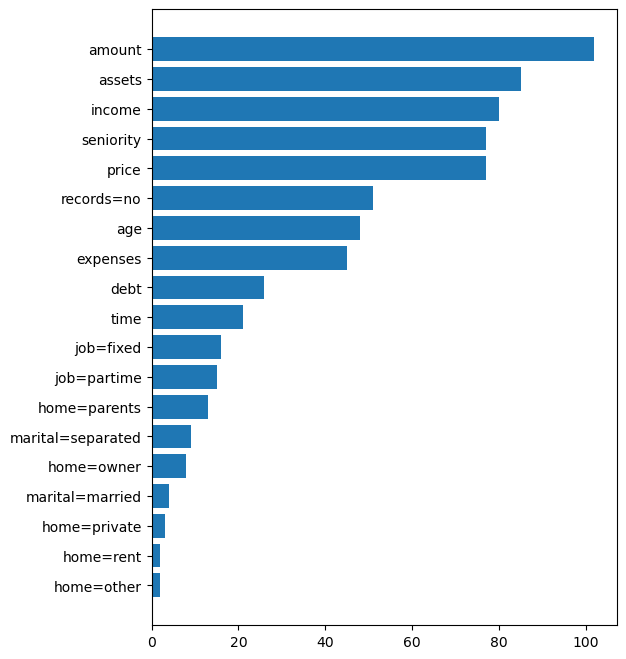

In [126]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

## Extremely randomized trees

Similar to random forest, but more random. Instead of selecting the best split among all posible splits, ET picks a few candidate splits at random and then select the best one among them.

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

In [128]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.770
20 -> 0.784
30 -> 0.778
40 -> 0.779
50 -> 0.790
60 -> 0.795
70 -> 0.794
80 -> 0.791
90 -> 0.788
100 -> 0.792
110 -> 0.792
120 -> 0.789
130 -> 0.795
140 -> 0.791
150 -> 0.794
160 -> 0.798
170 -> 0.794
180 -> 0.795
190 -> 0.793
200 -> 0.797


AUC is > then Decision tress, but less than RandomForest for XGBoost classifier